# image filters 


Image Filtering Summary
🔹 1. Types of Filters

Filters are generally divided into three categories:

    Smoothing: Reduces noise, softens the image, may blur details. (e.g., Gaussian Blur)

    Sharpening: Enhances edges, makes details clearer.

    Enhancing: Boosts specific features like contrast or texture.

🔹 2. Kernel (Filter Matrix)

    The kernel is the core of the filter — usually 3x3, 5x5, etc.

    Kernel size = area of influence during filtering.

    The operation is applied to the center pixel of the kernel window.

    Other surrounding pixels affect the result but don’t directly receive new values.

    Edge pixels might be skipped if the kernel would go out of bounds (unless padding is used).

🔹 3. Who Defines the Kernel?

    You do.

    Kernel size and values are chosen based on the goal (e.g., more blur, stronger edge detection).

🔹 4. Clipping

    After applying a filter, some pixel values may exceed the valid range (e.g., go above 255).

    These values are clipped:

        If value > 255 → set to 255

        If value < 0 → set to 0

    Clipping ensures pixel values stay in the 0–255 range for 8-bit images.

🔹 5. Intuition Behind Filters

    Intuition = understanding what the filter is doing just by looking at the output values.

Examples:
Output Value	Interpretation
Low value (~0)	No change in pixel intensity → flat area (no edge)
High value	Intensity changes → edge detected
Positive/Negative	Direction of change (e.g., left→right or top→bottom)

Example:

    Sobel X filter → large value means horizontal edge detected.



In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
image = cv2.imread("./filter.jpg" , cv2.IMREAD_GRAYSCALE)



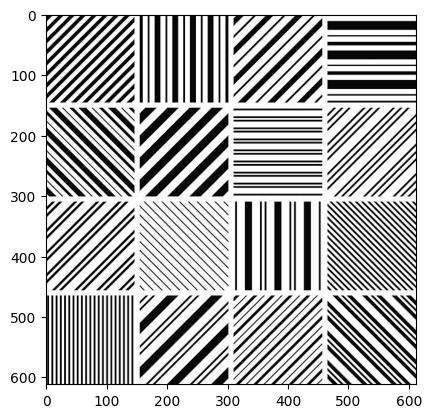

In [26]:
plt.imshow(image   , cmap="gray")

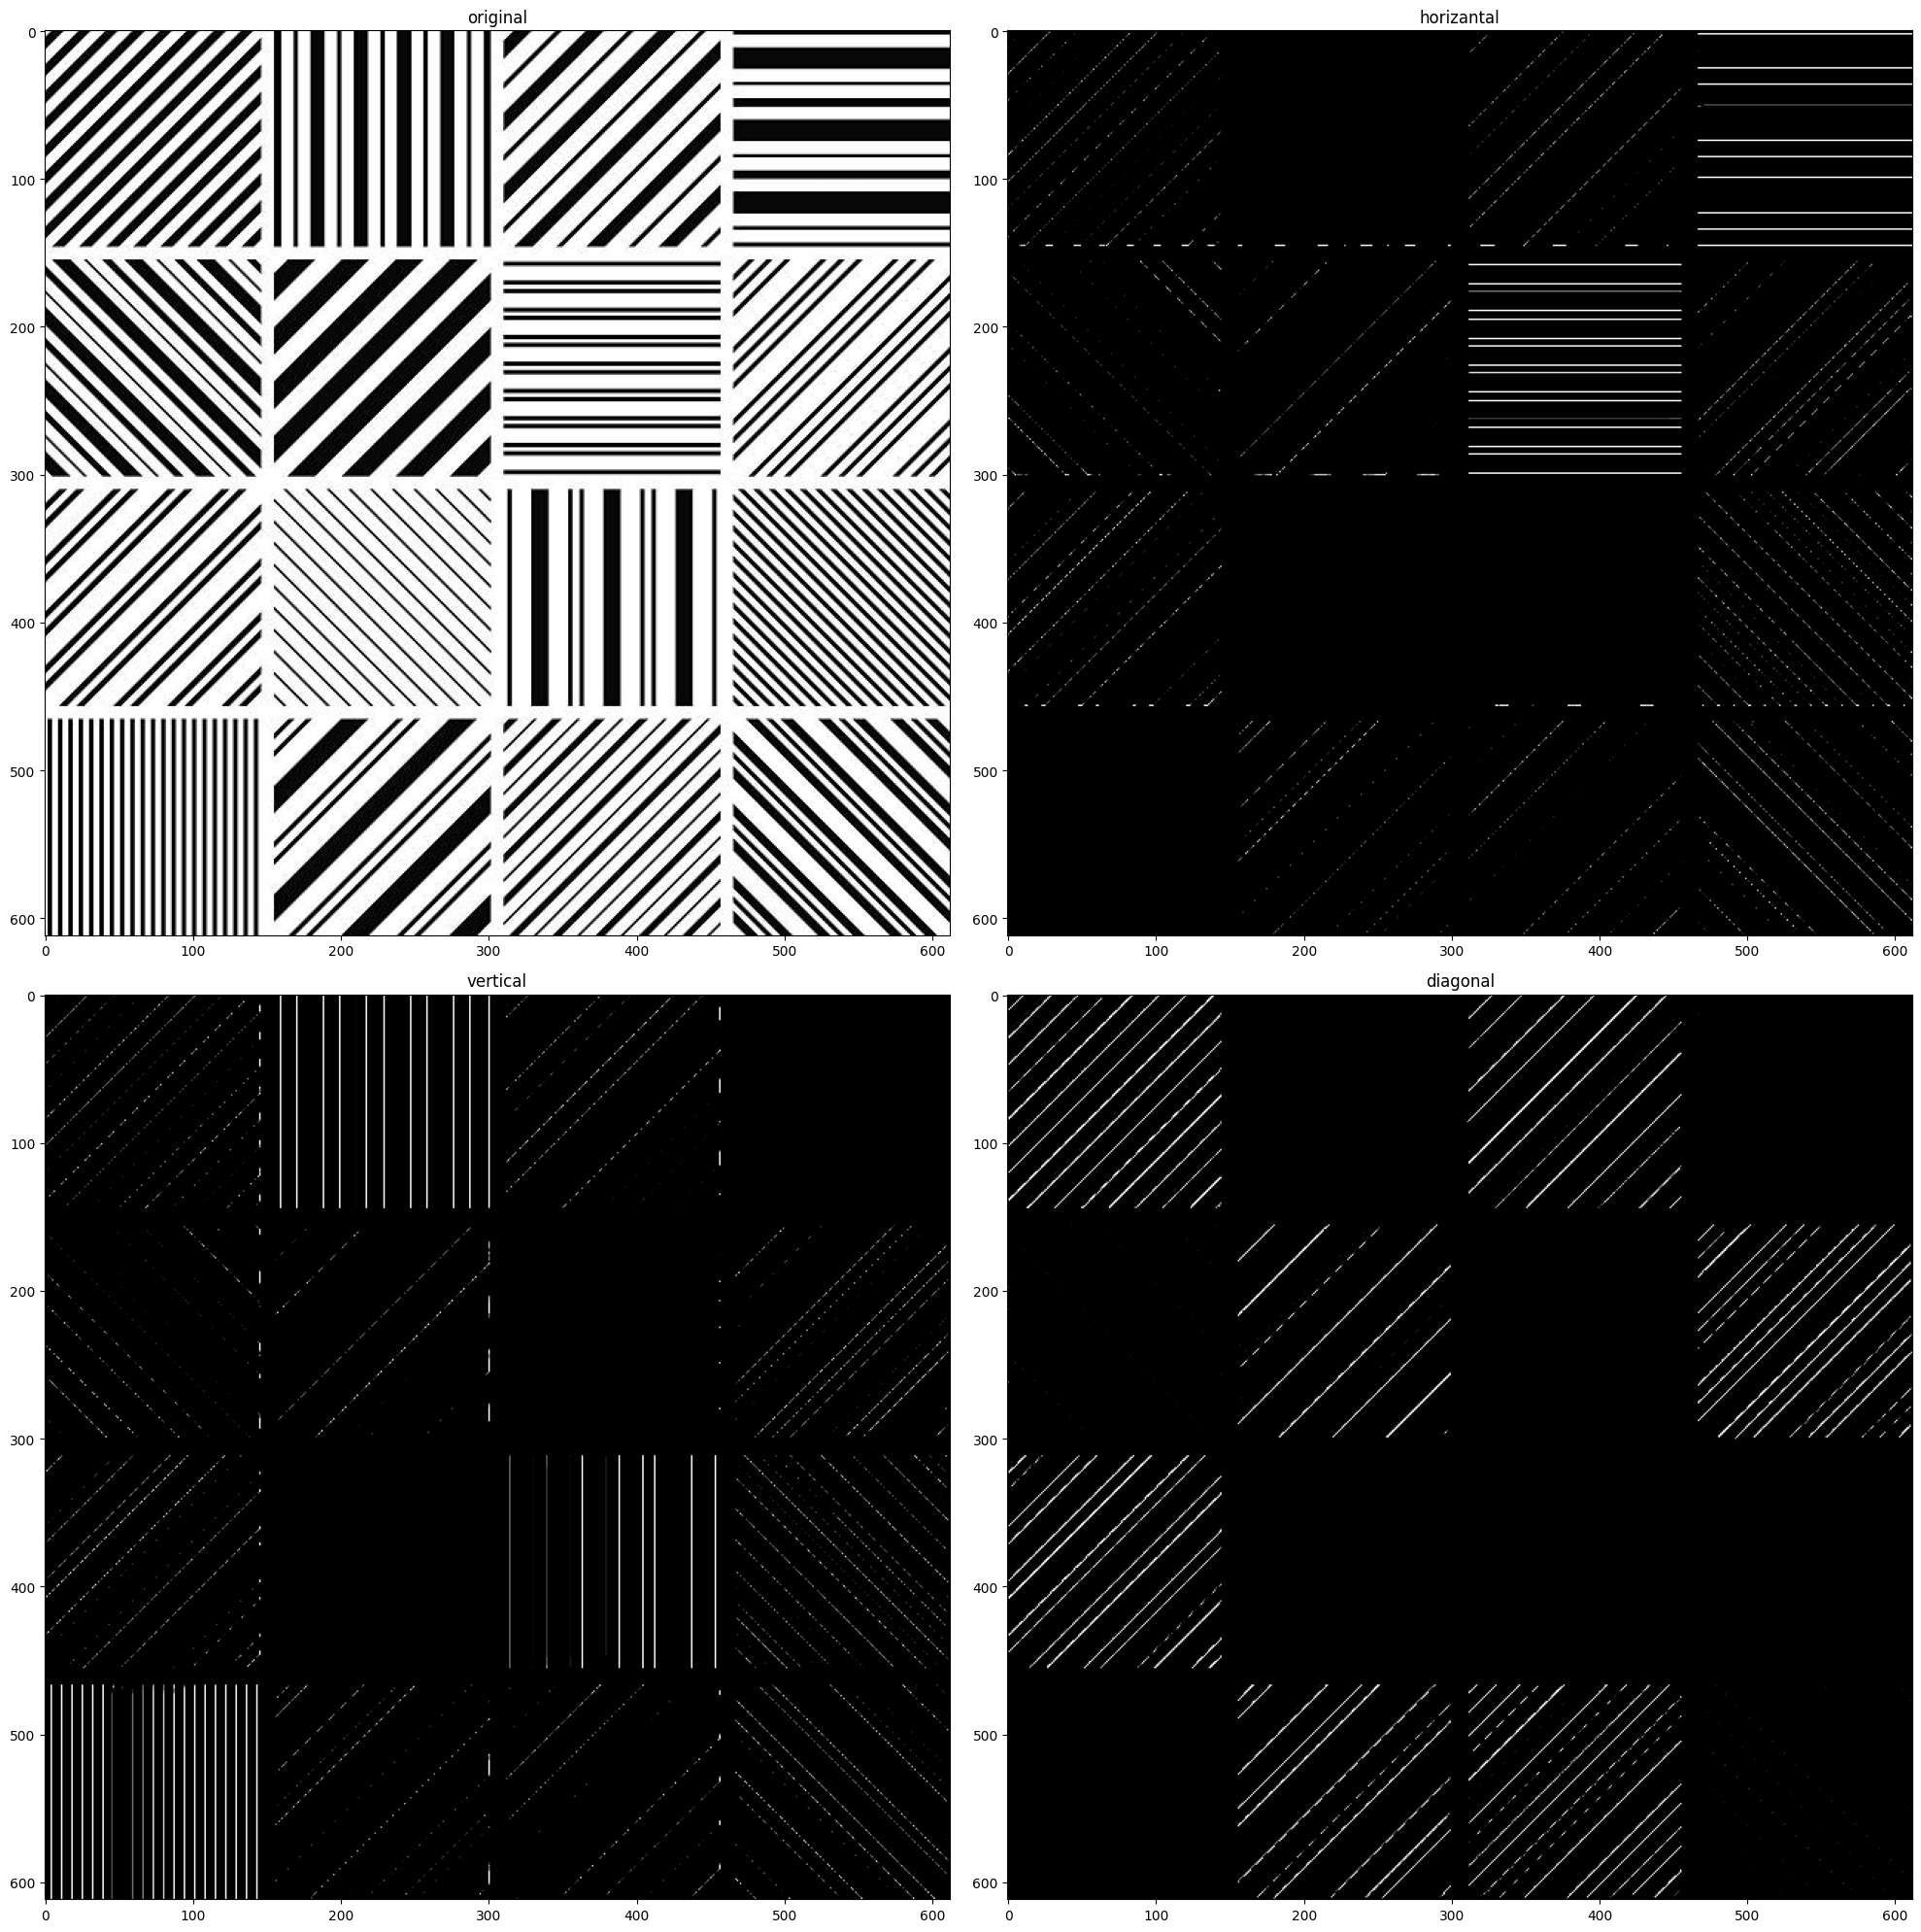

In [ ]:
x = -10

horizantal_kernel = np.array([[-1,-1,-1],
                       [ x, x, x],
                       [ 1, 1, 1]
                       ])
vertical_kernel = np.array([[-1,x,1],
                       [ -1, x, 1],
                       [ -1, x, 1]
                       ])
diagonal_kernel = np.array([[-1,-1,x],
                       [ -1, x, 1],
                       [ x, 1, 1]
                       ])
horizantal_filter_image = cv2.filter2D(image  , -1 , horizantal_kernel)
vertical_filter_image = cv2.filter2D(image  , -1 , vertical_kernel)
diagonal_filter_image = cv2.filter2D(image  , -1 , diagonal_kernel)

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.title("original")
plt.imshow(image , cmap="gray")
plt.subplot(2,2,2)
plt.title("horizantal")
plt.imshow(horizantal_filter_image , cmap="gray")
plt.subplot(2,2,3)
plt.title("vertical")
plt.imshow(vertical_filter_image , cmap="gray")
plt.subplot(2,2,4)
plt.title("diagonal")
plt.imshow(diagonal_filter_image , cmap="gray")
plt.tight_layout()
plt.show()